<a href="https://colab.research.google.com/github/kalnikos/Document-Classification-/blob/main/MNB_MLR_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
## from zipfile import ZipFile
file_name = "/content/Pickles.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [20]:
## Read the different data parts
import pickle
path_df = "/content/Pickles/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

path_X_train = "/content/Pickles/X_train.pickle"
with open(path_X_train, 'rb') as data:
    X_train = pickle.load(data)

path_X_test = "/content/Pickles/X_test.pickle"
with open(path_X_test, 'rb') as data:
    X_test = pickle.load(data)

path_y_train = "/content/Pickles/y_train.pickle"
with open(path_y_train, 'rb') as data:
    y_train = pickle.load(data)

path_y_test = "/content/Pickles/y_test.pickle"
with open(path_y_test, 'rb') as data:
    y_test = pickle.load(data)

Train the first model 

Naive Bayes classifier for multinomial models

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.



In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mult_clf = MultinomialNB()
mult_clf

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
## Fit the model
mult_clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
## Predictions
y_pred = mult_clf.predict(X_train)

## Train set accuracy
print("Accuracy:",accuracy_score(y_train, y_pred))

Accuracy: 0.9444444444444444


In [25]:
## Check the cross validation scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mult_clf, X_train, y_train, cv=10, scoring="accuracy")
scores

array([0.7962963 , 0.85185185, 0.81481481, 0.82407407, 0.84259259,
       0.87037037, 0.83333333, 0.85185185, 0.84259259, 0.87037037])

In [57]:
## test set accuracy
pred_test = mult_clf.predict(X_test)

## Train set accuracy
print("Accuracy:",accuracy_score(y_test, pred_test))

Accuracy: 0.8347107438016529


In [58]:
# Classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Classification report")
print(classification_report(y_test,pred_test))

Classification report
              precision    recall  f1-score   support

           0       0.87      0.72      0.79        18
           1       0.72      0.87      0.79        15
           2       0.91      0.87      0.89        23
           3       0.83      0.87      0.85        23
           4       0.78      0.64      0.70        11
           5       0.80      0.73      0.76        11
           6       0.89      1.00      0.94         8
           7       0.86      1.00      0.92        12

    accuracy                           0.83       121
   macro avg       0.83      0.84      0.83       121
weighted avg       0.84      0.83      0.83       121



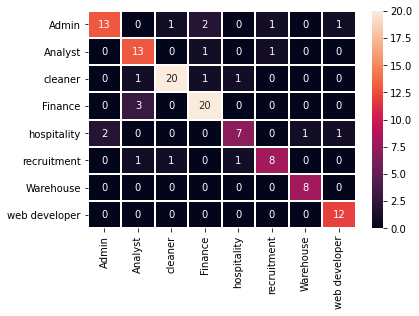

In [59]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
encode = {'Admin':0, 'Analyst':1, 'cleaner':2, 'Finance':3, 'hospitality':4,
       'recruitment':5, 'Warehouse':6, 'web developer':7}
labels = [i for i in encode]
cf_matrix = confusion_matrix(y_test, pred_test)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

In [60]:
D = {
     'Model': 'Multionomial Naive Bayes',
     'Train Set Accuracy': accuracy_score(y_train, mult_clf.predict(X_train)),
     'Test Set Accuracy': accuracy_score(y_test, pred_test)     

}

mnb_df = pd.DataFrame(D, index=[0])
mnb_df

,Model,Train Set Accuracy,Test Set Accuracy
0,Multionomial Naive Bayes,0.944444,0.834711


In [61]:
## Save the model
with open('/content/Pickles/MNB.pickle', 'wb') as output:
    pickle.dump(mult_clf, output)

## Save the data frame
with open('/content/Pickles/MNB_df.pickle', 'wb') as output:
  pickle.dump(mnb_df, output)

## Multinomial Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

## Base model
log_model = LogisticRegression(random_state=42)
print(log_model.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [29]:
## Fit the model
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
## Predictions
y_pred = log_model.predict(X_train)

## Train set accuracy
print("Accuracy:",accuracy_score(y_train, y_pred))

Accuracy: 0.9712962962962963


In [31]:
## Check the cross validation scores
scores = cross_val_score(log_model, X_train, y_train, cv=10, scoring="accuracy")
scores

array([0.86111111, 0.86111111, 0.89814815, 0.87037037, 0.90740741,
       0.90740741, 0.89814815, 0.89814815, 0.90740741, 0.87962963])

## Hyper mapameters tuning
### We'll tune the following ones:

## C = Inverse of regularization strength. Smaller values specify stronger regularization.
## multi_class = We'll choose multinomial because this is a multi-class problem.
## solver: For multiclass problems, only newton-cg, sag, saga and lbfgs handle multinomial loss.
## class_weight: Weights associated with classes.
## penalty: Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.

In [32]:
## Randomize grid search
# C
C = [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)]

# multi_class
multi_class = ['multinomial']

# solver
solver = ['newton-cg', 'sag', 'saga', 'lbfgs']
 
# class_weight
class_weight = ['balanced', None]

# penalty
penalty = ['l2']

# Create the random grid
parameters = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}

print(parameters)

{'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0], 'multi_class': ['multinomial'], 'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'], 'class_weight': ['balanced', None], 'penalty': ['l2']}


In [33]:
# Random search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

random_search = RandomizedSearchCV(estimator=log_model,
                                   param_distributions=parameters,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 22.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=42,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'C': [0.1, 0.2, 0.30000000000000004,
                                              0.4, 0.5, 0.6, 0.7000000000000001,
                                              0.8, 0.9, 1.0],
                                        'class_weight': ['balan

In [34]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'class_weight': 'balanced', 'C': 1.0}

The mean accuracy of a model with these hyperparameters is:
0.8842592592592592


In [41]:
## Save the model
best_mlr = random_search.best_estimator_
best_mlr

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=42, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [42]:
## Fit the model
best_mlr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=42, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [43]:
## pedictions
y_pred = best_mlr.predict(X_train)

## Train set accuracy
print("Accuracy:",accuracy_score(y_train, y_pred))

Accuracy: 0.9712962962962963


In [46]:
## test set predictions
test_pred = best_mlr.predict(X_test)

## test set accuracy
print("Test set Accuracy:",accuracy_score(y_test, test_pred))

Test set Accuracy: 0.9008264462809917


In [48]:
# Classification report
print("Classification report")
print(classification_report(y_test,test_pred))

Classification report
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.93      0.87      0.90        15
           2       0.91      0.87      0.89        23
           3       0.96      1.00      0.98        23
           4       0.62      0.73      0.67        11
           5       1.00      0.73      0.84        11
           6       0.89      1.00      0.94         8
           7       1.00      1.00      1.00        12

    accuracy                           0.90       121
   macro avg       0.90      0.89      0.89       121
weighted avg       0.91      0.90      0.90       121



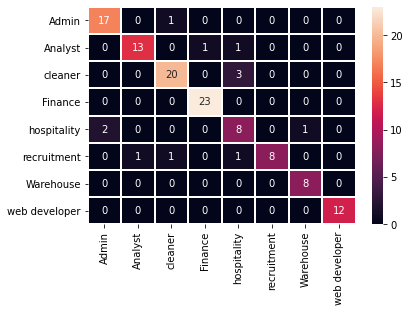

In [49]:
## Confusion matrix
labels = [i for i in encode]
cf_matrix = confusion_matrix(y_test, test_pred)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

In [53]:
## Create a data freme with the model train, test set accuracy
D = {
     'Model': 'Multionomial Logistic Regression',
     'Train Set Accuracy': accuracy_score(y_train, best_mlr.predict(X_train)),
     'Test Set Accuracy': accuracy_score(y_test, test_pred)
}

mlr_df = pd.DataFrame(D, index=[0])
mlr_df

,Model,Train Set Accuracy,Test Set Accuracy
0,Multionomial Logistic Regression,0.971296,0.900826


In [56]:
## Save the model
with open('/content/Pickles/best_mlr.pickle', 'wb') as output:
    pickle.dump(best_mlr, output)

## Save the data frame
with open('/content/Pickles/mlr_df.pickle', 'wb') as output:
  pickle.dump(mlr_df, output)